<a href="https://colab.research.google.com/github/yeonji200522-oss/Hands-on-Machine-Learning/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **3장 분류**
###**3.1 MNIST**
(MNIST: 미국 인구 조사과정에서 손으로 쓴 70,000개의 작은 숫자 이미지 데이터셋)  
사이킷런의 함수를 사용해 데이터셋 내려받기  


In [1]:
#OpenML.org에서 MNIST 데이터셋 내려받기
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

sklearn.datasets에 있는 함수는 대부분 세 종류  
1. fetch_* 함수  
: fetch_openml()과 같이 실전 데이터셋을 다운로드하기 위한 함수  
2. load_* 함수  
: 사이킷런에 번들로 포함된 소규모 데이터셋을 로드하기 위한 함수  
3. make_* 함수  
: 테스트에 유용한 가짜 데이터셋을 생성하기 위한 함수  
생성된 데이터 셋은 일반적으로 넘파이 배열이며 입력과 타깃 데이터를 담은 (X, y) 튜플로 반환  
DESCR(데이터셋 설명), data(입력 데이터, 2D 배열), target(레이블, 1D 배열)의 속성으로 반환  
  
fetch_openml() 함수는 기본적으로 입력을 판다스 데이터프레임, 레이블을 판다스 시르즈로 반환  
하지만 MNIST 데이터셋은 이미지이므로 데이터프레임이 잘 맞지 않기에 as_frame=False로 지정해 넘파이 배열로 데이터 받기.

In [2]:
#as_frame=False로 지정해 넘파이 배열
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [3]:
X.shape

(70000, 784)

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
y.shape

(70000,)

위의 내용을 살펴보면 70,000개의 이미지, 각 이미지에는 784개의 특성 존재. (이미지는 28x28)  
각각의 특성은 0 (흰색)~ 255 (검은색)까지의 픽셀 강도  
샘플의 특성 벡터를 추출해 28x28 배열로 크기를 바꾸고 맷플롯립의 imshow() 함수를 사용해 그림  
아래는 cmap="binary"로 지정해 흑백 컬러 맵 사용

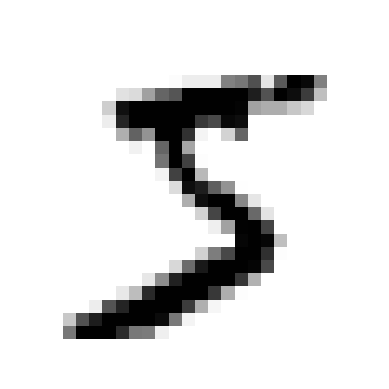

In [7]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [8]:
# 실제 레이블 확인
y[0]

'5'

데이터를 자세히 조사하기 전에 항상 테스트 세트를 만들고 따로 뗴어놓아야 함  
fetch_openml()이 반환한 MNIST 데이터셋은 이미 훈련세트와 테스트 세트로 나뉘어있음

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

훈련 세트는 이미 섞여 있기에 모든 교차 검증 폴드를 비슷하게 만든다. 많은 비슷한 샘플이 연이어 나타나면 성능이 나빠짐. 그렇기에 데이터셋을 섞어 이런 문제 방지